[Table of Contents](./table_of_contents.ipynb)

# Preface

In [32]:
%matplotlib inline

In [33]:
#format the book
import book_format
book_format.set_style()

卡尔曼滤波器和贝叶斯的入门教材. 这本书是使用jupyter笔记本编写的，因此您可以在浏览器中阅读本书，还可以运行并修改代码，查看书中的结果。有什么更好的学习方法?


## 卡尔曼和贝叶斯过滤器

传感器很嘈杂。世界充满了我们要测量和跟踪的数据和事件，但是我们不能依靠传感器来提供完美的信息。我的汽车中的GPS报告了高度。每次我经过道路上的相同点时，都报告的高度略有不同。如果我两次称重相同的物体，我的厨房秤会给我不同的读数。

在简单的情况下，解决方案是显而易见的。如果我的量表给出略有不同的读数，我可以进行一些读数并求它们的平均。或者我可以用更加准确的量表。但是，当传感器非常嘈杂，或者环境使数据收集变得困难时，我们该怎么办？我们可能正在尝试跟踪低空飞机的运动。我们可能希望为无人机创建一个自动驾驶仪，或确保我们的农场拖拉机播种整个田地。我研究计算机视觉，需要在图像中跟踪移动对象，并且计算机视觉算法会产生非常嘈杂和不可靠的结果。

本书教您如何解决这些过滤问题。我使用许多不同的算法，但它们都是基于 *贝叶斯概率*。简而言之，贝叶斯概率决定了基于过去的信息可能是正确的。

如果我这一刻问你汽车的朝向，您将不知道。您会提供一个数字
1$^\circ$ and 360$^\circ$ 角度, 并有360分之一的机会正确. 现在假设我告诉你2秒前的朝向是243$^\circ$。 在2秒钟内，我的汽车无法转过很远，因此您可以做出更准确的预测。 您正在使用过去的信息来更准确地推断有关当前或未来的信息。

这个世界是嘈杂的. 预测可以帮助您做出更好的估计, 但这也会受到噪音. 我可能只是为狗做刹车或在坑洼周围转弯. 道路上的强风和冰对我的汽车的路径产生了外部影响. 在控制文献中，我们称之为 *噪声* 尽管您可能不会那样想。. 

贝叶斯的概率还有更多内容，但是你需要知道主要的问题。信息是不确定，我们根据已有的信息改变了我们的想法。卡尔曼（Kalman）和贝叶斯（Bayesian）过滤融合了我们不准确且有限的知识，以产生对系统状态的最佳估计。我们的原则是永远不要丢弃信息。

假设我们正在追踪一个物体，一个传感器报告说它突然改变了方向。它真的转向了吗，还是数据不准确了？看情况。如果这是一架喷气式战斗机，我们会倾向于相信这是一次突然的机动。如果是直线上的货运列车，我们会忽视。我们会根据传感器的准确程度进一步修改我们的信念。我们的信念依赖于过去，依赖于我们对所追踪系统的了解，依赖于传感器的特性。

卡尔曼滤波器是由鲁道夫 · 埃米尔 · 卡尔曼发明的，目的是用数学上最优的方法来解决这类问题。它的第一次使用是在阿波罗登月任务中，从那时起，它已经被用于各种各样的领域。在飞机、潜艇和巡航导弹上都有卡尔曼滤波器。华尔街用它们来跟踪市场。它们被用于机器人、物联网传感器和实验室仪器。化工厂用它们来控制和监测反应。它们被用来进行医学成像和消除噪音从心脏信号。如果涉及传感器和/或时间序列数据，通常会涉及 Kalman 滤波器或与卡尔曼滤波器关系密切的数据。

## 这本书的动机

我是一名软件工程师，在航空航天领域工作了将近20年，所以我一直在使用卡尔曼滤波器，但从未实现过。他们向来以难缠著称。这个理论很漂亮，但是如果你还没有在信号处理、控制理论、概率和统计、导向和控制理论等方面受过良好的训练，就很难学习。随着我着手解决计算机视觉跟踪问题，迫切需要自己实现这些问题。

这个领域有很多优秀的教科书，比如 Grewal 和 Andrew 的*卡尔曼滤波*。但是，如果你没有必要的背景知识，坐下来试着阅读这些书中的许多书是一种令人沮丧和痛苦的经历。通常，前几章会讲述几年的本科数学课程，愉快地向你介绍微积分课本，并用几个简短的段落展示整个学期的统计数据。它们是高年级本科生或研究生水平课程的教科书，是研究人员和专业人员的宝贵参考资料，但是对于更随意的读者来说，阅读真的很困难。不同的文本对同一概念使用不同的单词和变量名，而且书中几乎没有实例或工作问题。我经常发现自己能够解析这些单词并理解一个定义的数学，但是对于这些单词和数学试图描述的现实世界中的现象却一无所知。“但那是什么*意思*?”下面是一些曾经困扰我的典型例子:

$$\begin{aligned}\hat{x}_{k} = \Phi_{k}\hat{x}_{k-1} + G_k u_{k-1} + K_k [z_k - H \Phi_{k} \hat{x}_{k-1} - H G_k u_{k-1}]
\\ 
\mathbf{P}_{k\mid k} = (I - \mathbf{K}_k \mathbf{H}_{k})\textrm{cov}(\mathbf{x}_k - \hat{\mathbf{x}}_{k\mid k-1})(I - \mathbf{K}_k \mathbf{H}_{k})^{\text{T}}  + \mathbf{K}_k\textrm{cov}(\mathbf{v}_k )\mathbf{K}_k^{\text{T}}\end{aligned}$$

然而，当我最终开始理解卡尔曼滤波器时，我意识到其基本概念是相当直观的。如果你知道一些简单的概率规则，并对如何融合不确定性知识有一些直觉，卡尔曼滤波器的概念是可以理解的。卡尔曼滤波器有困难的名声，但去掉了许多正式术语的美丽的主题和他们的数学对我来说变得清晰，我爱上了这个主题。

当我开始理解数学和理论时，更多的困难出现了。 一本书或一篇论文会陈述一些事实，并提出一个图表作为证明。  不幸的是，我不清楚为什么这个说法是真实的，或者我不能复制这个情节。也许我在想 "如果R=0是真的?" 或者作者在如此高的层次上提供伪代码，以至于实现不明显。有些书提供了 Matlab 代码，但我没有这种昂贵软件包的许可证。最后，许多书以许多有用的练习结束每一章。如果你想为自己实现卡尔曼滤波器，你需要理解的练习，但是没有答案的练习。如果你在教室里使用这本书，也许这是可以的，但是对于独立的读者来说这是很糟糕的。我讨厌作者对我隐瞒信息，大概作者是为了避免学生在课堂上“作弊”。

所有这些都阻碍了学习。 我想跟踪屏幕上的图像，或者为我的 Arduino 项目编写一些代码。 我想知道书中的情节是如何构成的，并且选择不同于作者选择的参数。 我想进行模拟，我想在信号中注入更多的噪声，看看滤波器的性能如何。 在日常代码中使用卡尔曼滤波器的机会成千上万,然而，这个最直接的话题是火箭科学家和学者的一些研究。

我写这本书就是为了满足这些需求。如果你设计军用雷达，这不是你唯一的书。去一所优秀的科学、技术、工程、数学学校获得硕士或博士学位，因为你需要它。这本书是为业余爱好者，好奇，和工作的工程师，需要过滤或平滑的数据。如果你是一个业余爱好者，这本书应该提供你需要的一切。如果你对卡尔曼滤波器是认真的，你将需要更多。我的意图是介绍足够的概念和数学，使教科书和论文可接近。


这本书是互动的。 虽然您可以在线阅读它作为静态内容，我敦促您按照预期使用它。它使用Jupyter Notebook编写。这允许我结合文本、数学、Python以及Python的输出。这本书里的每一个情节，每一个数据都是由notebook嵌入的Python生成 。要将参数的值加倍? 只需要改变其值, 按下 CTRL-ENTER. 将出现新的绘图或打印输出。

这本书有练习，但也有答案。我相信你。如果你只是需要一个答案，那就直接去看吧。如果您想要内化这些知识，请在阅读答案之前尝试执行这个练习。因为这本书是交互式的，所以您可以在这本书中输入并运行您的解决方案 - 你不必移动到一个不同的环境，或者在开始处理之前导入一大堆东西。

这本书是免费的，我花了几千美元在卡尔曼过滤书上。我不敢相信，在经济不景气的情况下，或者在经济上举步维艰的学生，能够买得起这些东西。我从自由软件中获益良多，比如 Python, 还有像艾伦 · B · 唐尼那样的免费书籍  [1]. 是时候贡献了。因此，这本书是免费的，它托管在 GitHub 的免费服务器上，它只使用免费和开放的软件，如 IPython 和 MathJax。

## 在线阅读

<b>GitHub</b>

这本书托管在GitHub,你可以通过点击章节名字来进行阅读。GitHub 静态呈现Jupyter Notebooks。您将无法运行或更改代码，但可以阅读所有内容。

此项目的 GitHub 页面位于

    https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python 


<b>binder</b>


Binder 提供在线交互式 notebooks，所以你可以在浏览器中运行代码并更改代码，而无需下载或安装 Jupiter。使用此链接通过binder访问该书:

    http://mybinder.org/repo/rlabbe/Kalman-and-Bayesian-Filters-in-Python

<b>nbviewer</b>

Nbview 网站将以静态格式呈现任何Notebook。我发现它比 GitHub 的渲染器稍微好一点，但是使用起来有点困难。它直接访问 GitHub; 我在 GitHub 中检入的任何内容都将由 nbview 呈现。
你可以在这里通过网络查看这本书:

http://nbviewer.ipython.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/table_of_contents.ipynb

## PDF 版本

我定期从notebooks中生成一个 PDF 文档，你可以在这里访问:

https://drive.google.com/file/d/0By_SW19c1BfhSVFzNHc0SjduNzg/view?usp=sharing

## 下载和运行Book

然而，这本书的目的是互动，我建议使用这种形式。 虽然有点费劲，但是很值得。 如果您在计算机上安装 IPython 和一些支持库，然后克隆这本书，您将能够自己运行这本书中的所有代码。 您可以执行实验，查看过滤器如何对不同的数据作出反应，查看不同的过滤器如何对相同的数据作出反应，等等。 我发现这种即时反馈既重要又令人振奋。 你不必担心“如果发生了什么”，试试看吧！

安装说明可以在安装附录中找到 [here](http://nbviewer.ipython.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Appendix-A-Installation.ipynb).

一旦软件被安装，你可以导航到安装目录，并运行Juptyer notebook与命令行指令

    jupyter notebook

这将打开一个显示基目录内容的浏览器窗口。 这本书按章节排列。 每一章节命名为 *xx*-*name*.ipynb, 其中 *xx* 是章节号的意思. .ipynb 是扩展名. 想要阅读第二章, 点击第二章的链接即可. 这将使浏览器打开该子目录。 在每个子目录中都有一个或多个 IPython Notebooks (所有笔记本都有一个. ipynb 文件扩展名)。章节内容和章节名称同名在笔记本中。 有时还有一些支持notebooks，可以用来做一些事情，比如生成在本章中显示的动画。 这些内容并不打算由最终用户阅读，但是当然，如果您对动画是如何制作感到好奇，那么请继续阅读。

无可否认，这是一个笨拙的界面，一本书。我正在跟随其他几个项目的脚步，重新利用Jupyter Notebook电脑生成整本书。我觉得这些小麻烦会带来巨大的回报——当你试图阅读一本书的时候，你不必下载一个单独的代码库并在 IDE 中运行它，所有的代码和文本都在一个地方。 如果要更改代码，可以这样做，并立即看到更改的效果。如果您发现了一个 bug，可以进行修复，并将其推回到我的存储库中，这样世界上的每个人都会从中受益。而且，当然，你永远不会遇到一个问题 - 这本书和代码彼此不同步，让你摸不着头脑，不知道该信任哪个来源。

## Jupyter

首先，关于在本书中使用Jupyter Notebooks的一些话。 这本书是互动的。如果希望运行代码示例，尤其是希望看到动画图形，则需要运行代码单元格。我不能教你所有关于Jupyter Notebooks的东西。然而，有些事情会让读者感到困惑。你也可以去http://jupyter.org/ 获取细节文档

首先，必须始终运行最顶层的代码单元格，即带有注释的单元格 `#format the book`. 就在正上方。 这不仅设置了您可能不关心的格式设置，而且还加载了一些必要的模块，并对绘图和打印进行了一些全局设置。 所以，总是运行这些单元格，除非你只是被动地阅读。

The line

```python
%matplotlib inline
```
Matplotlib 是一个绘图软件包，描述如下。出于某些原因，我不明白 Jupiter Notebooks的默认行为是在外部窗口中生成图形。 

百分比符号 `%matplotlib` 用于 IPython *魔法* - 这些是内核的命令，用于执行不属于 Python 语言的操作。 有许多有用的魔法命令，你可以在这里阅读:http://ipython.readthedocs.io/en/stable/interactive/magics.html 

在单元格中运行代码很容易。 单击它，使其具有焦点(将在其周围绘制一个框) ，然后按 Ctrl-Enter。

其次，单元格必须按顺序运行。 我把问题分解成几个cells; 如果您尝试跳过并运行第十个代码cells，那么几乎可以肯定不会起作用。如果你还没有运行任何东西，只要选择在 **Cell** 菜单部分选择 *Run All Above* 。这是确保一切正常运行的最简单方法。

一旦单元格运行，您通常可以跳转并按不同的顺序重新运行单元格，但并非总是如此。 我在努力弥补，但是有得必有失。我将在单元格10中定义一个变量，然后运行代码修改单元格11和12中的变量。 如果返回并再次运行单元格11，该变量将具有在单元格12中设置的值，并且代码期望获得在单元格10中设置的值。 所以，偶尔你会得到奇怪的结果，如果你运行的细胞顺序。 我的建议是稍微回溯一下，再次运行单元格以返回到正确的状态。这很烦人，但 Jupyter notebooks的互动性弥补了这一点。更好的方法是，在 GitHub 上提交一个问题，这样我就可以知道问题并修复它！

最后，一些读者报告了一些浏览器中动画绘图特性的问题。 我无法复制这个。在书的某些部分，我使用了 `%matplotlib notebook` 魔法命令,可以进行交互式绘图。如果这些对你不起作用，试着把它们改成 `%matplotlib inline`. 您将失去动画绘图，但它似乎可以在所有平台和浏览器上工作。

## SciPy, NumPy, and Matplotlib

SciPy 是一个开源的数学软件集合。SciPy 中包括 NumPy，它提供了数组对象、线性代数、随机数等。 Matplotlib 提供了 NumPy 数组的绘图。 SciPy 的模块复制了 NumPy 中的一些功能，同时增加了优化、图像处理等功能。

为了保持我对这本书的努力是可管理的，我选择假设您知道如何在 Python 中编程，并且您也熟悉这些包。尽管如此，我还是要花一些时间来说明每种方法的一些特点;实际上，你必须找到外部来源来教你的细节。SciPy 的主页,https://scipy.org, 是一个完美的起点，尽管你很快就会想要搜索相关的教程和/或视频。

NumPy、 SciPy 和 Matplotlib 没有提供缺省的 Python 发行版;查看 *Installation* 附件，如果您没有安装它们。

我在整本书中使用了 NumPy 的数组，现在让我们来了解一下它们。 如果您想成为专家，请参考 NumPy 的文档。

`numpy.array` 实现一个或多个维数组。 它的类型是 `numpy.ndarray`, 我们简称为 ndarray。您可以使用任何类似列表的对象来构造它。下面从列表中构造一个1-D 数组:

In [1]:
import numpy as np
x = np.array([1, 2, 3])
print(type(x))
x

<class 'numpy.ndarray'>


array([1, 2, 3])

它已经成为一个行业标准来使用 `import numpy as np`. 

还可以使用元组::

In [2]:
x = np.array((4,5,6))
x

array([4, 5, 6])

创建带有嵌套括号的多维数组:

In [3]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])
print(x)

[[1 2 3]
 [4 5 6]]


您可以创建3维或更多维的数组，但是我们在这里不需要它，因此我不会详细说明。

默认情况下，数组使用列表中值的数据类型; 如果有多个类型，那么它将选择最准确地表示所有值的类型。 因此，例如，如果您的列表包含 `int` 和 `float` 那么数组的数据类型为 `float`。你可以使用 `dtype` 参数来设定。

In [4]:
x = np.array([1, 2, 3], dtype=float)
print(x)

[1. 2. 3.]


您可以使用下标位置访问数组元素:

In [6]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])

print(x[1,2])

6


可以使用切片访问列或行。 符号 (:) 用作下标是该行或该列中所有数据的简写。 因此 `x[:,0]` 返回第一列中所有数据的数组 (0指定第一列):

x[:, 0]

我们可以排在第二排:

In [7]:
x[1, :]

array([4, 5, 6])

获取第二行的最后两个元素:

In [8]:
x[1, 1:]

array([5, 6])

和Python `list`一样,可以使用负索引来引用数组的末尾。 -1 表示最后的index.因此，获得第二行(最后一行)的最后两个元素的另一种方法是:

In [9]:
x[-1, -2:]

array([5, 6])

你可以执行矩阵相加用 `+` 符号, 但是矩阵乘法需要 `dot` 方法或者函数. `*` 操作符 执行元素相乘, 这**不是**你想要的线性代数。

In [10]:
x = np.array([[1., 2.],
              [3., 4.]])
print('addition:\n', x + x)
print('\nelement-wise multiplication\n', x * x)
print('\nmultiplication\n', np.dot(x, x))
print('\ndot is also a member of np.array\n', x.dot(x))

addition:
 [[2. 4.]
 [6. 8.]]

element-wise multiplication
 [[ 1.  4.]
 [ 9. 16.]]

multiplication
 [[ 7. 10.]
 [15. 22.]]

dot is also a member of np.array
 [[ 7. 10.]
 [15. 22.]]


Python 3.5引入了 `@` 操作符用作矩阵乘法

In [11]:
x @ x

array([[ 7., 10.],
       [15., 22.]])

这只有在使用 Python 3.5 + 时才有效。 这本书需要3.6或更高版本，所以我会尽可能使用它。 注意，运算符要求两个值都是数组。 因此, `x @ 3.` 引发 ValueError，而 `np.dot(X, 3.)`工作正常

你可以用 `.T`,反之亦然 `numpy.linalg.inv`. SciPy 软件包还提供了反函数。

In [12]:
import scipy.linalg as linalg
print('transpose\n', x.T)
print('\nNumPy ninverse\n', np.linalg.inv(x))
print('\nSciPy inverse\n', linalg.inv(x))

transpose
 [[1. 3.]
 [2. 4.]]

NumPy ninverse
 [[-2.   1. ]
 [ 1.5 -0.5]]

SciPy inverse
 [[-2.   1. ]
 [ 1.5 -0.5]]


有一些助手函数，比如 `zeros` 创建一个由所有零组成的矩阵, `ones` 全一, 并且 `eye` 得到恒等矩阵。如果需要多维数组，请使用元组指定形状。

In [13]:
print('zeros\n', np.zeros(7))
print('\nzeros(3x2)\n', np.zeros((3, 2)))
print('\neye\n', np.eye(3))

zeros
 [0. 0. 0. 0. 0. 0. 0.]

zeros(3x2)
 [[0. 0.]
 [0. 0.]
 [0. 0.]]

eye
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


我们有创建等间隔数据的函数。 `arange` 和Python的 `range` 很像, 只是它返回一个 NumPy 数组。 `linspace` 工作原理稍有不同，称之为 `linspace(start, stop, num)`,其中 `num` 是所需数组的长度。

In [14]:
np.arange(0, 2, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [15]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

现在让我们绘制一些数据，大部分都很简单。Matplotlib 包含一个绘图库 `pyplot`.按照行业标准import为 `plt`. 导入之后，通过调用 `plt.plot` 用一个数字列表或数组绘图。 如果您进行多次调用，它将绘制多个序列，每个序列具有不同的颜色。

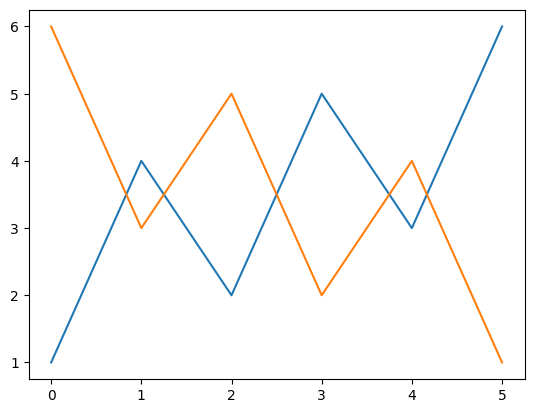

In [20]:
import matplotlib.pyplot as plt
a = np.array([6, 3, 5, 2, 4, 1])
plt.plot([1, 4, 2, 5, 3, 6])
plt.plot(a)

输出 `[<matplotlib.lines.Line2D at 0x2ba160bed68>]` 是因为 `plt.plot` 返回刚刚创建的对象。通常我们不希望看到这一点，所以我添加了一个 `;` 到我最后一个抑制输出的绘图命令。

默认情况下 `plot` 假设 x 轴的级数增加1。您可以通过同时传入 x 和 y 来提供自己的 x 级数。

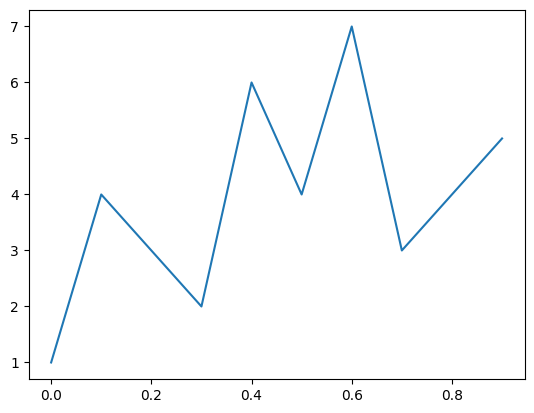

In [17]:
plt.plot(np.arange(0,1, 0.1), [1,4,3,2,6,4,7,3,4,5]);

我在本书中使用的这些软件包还有更多的特性。通常我会不加解释地介绍它们，相信你可以从上下文中推断出它们的用法，或者在网上搜索解释。一如既往，如果您不确定，可以在 Notebook 中创建一个新单元格，或者启动 Python 控制台并进行实验！

### 联系 -  创建 arrays

我希望您创建一个包含10个元素的 NumPy 数组，每个元素包含1/10。有几种方法可以做到这一点; 尽量实现您能想到的尽可能多的方法。

In [25]:
# your solution
ta = np.array([1/10]*10)

### 答案

这里有三种方法。第一种是我想让你知道的。我用了 '/' 运算符将数组的所有元素除以10。 我们将很快使用它来将一个单位矩阵从米转换为公里。

In [26]:
print(np.ones(10) / 10.)
print(np.array([.1, .1, .1, .1, .1, .1, .1, .1, .1, .1]))
print(np.array([.1] * 10))

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


还有一个我没说。 函数 `numpy.asarray()` 将它的参数转换为 ndarray，如果它还不是 ndarray 的话。 如果是，则数据保持不变。这是编写既可以接受 Python 列表也可以接受 ndarray 的函数的一种方便方法，而且如果类型已经是 ndarray，那么这种方法非常有效，因为没有创建任何新的内容。

In [27]:
def one_tenth(x):
    x = np.asarray(x)
    return x / 10.

print(one_tenth([1, 2, 3]))            # I work!
print(one_tenth(np.array([4, 5, 6])))  # so do I!

[0.1 0.2 0.3]
[0.4 0.5 0.6]


## 同伴软件

我正在编写一个名为 FilterPy 的开源贝叶斯过滤 Python 库。

FilterPy 托管于 GitHub (https://github.com/rlabbe/filterpy) 但是 `pip` 安装的版本应该满足您的需要。

特定于书的代码与书一起存储在子目录中 **/kf_book**. 它包含格式化这本书的代码。 它还包含名称为 *xxx*_internal.py. 我使用这些函数来存储对特定章节有用的函数。 这使我能够隐藏 Python 代码，这些代码读起来并不特别有趣- 我可能正在生成一个图表，我希望您关注图表的内容，而不是如何使用 Python 生成该图表的机制。 如果你对其中的机制感到好奇，只要去浏览一下源代码就可以了。

有些章节介绍了对本书其余部分有用的函数。这些函数最初是在 Notebook 本身中定义的，但是代码也存储在 **/kf_book** 如果需要，在后面的章节中导入。 当我这样做的时候，我会在函数首次定义的地方编写文档，但是这仍然是一个正在进行的工作。 我尽量避免这种情况，因为这样我总是面临目录中的代码与书中的代码不同步的问题。 然而，Jupiter Notebook 并没有给我们提供一种在其他笔记本中引用代码单元的方法，所以这是我所知道的在笔记本之间共享功能的唯一机制。

有一个名为 **/experiments**. 这就是我在将代码放入书中之前编写和测试代码的地方。 里面有一些有趣的东西，你可以随便看看。 随着这本书的发展，我计划创建一些例子和项目，这些材料中的很多都会在这里结束。小型实验最终将被删除。如果你只是对阅读这本书感兴趣，你可以放心地忽略这个目录。 


文件夹 **/kf_book** 包含一个 css 文件，其中包含该书的样式指南。Jupyter Notebook的默认外观和感觉相当普通。 我已经遵循了书中的例子，例如 [Probabilistic Programming and Bayesian Methods for Hackers](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb) [2]. 我也深受 Lorena Barba 教授杰出作品的影响, [available here](https://github.com/barbagroup/CFDPython) [3].我所有的外观和感觉都归功于这些项目的工作。

## 关于 Python 与编码数学的思考

大多数卡尔曼滤波和其他工程文本是由数学家或学者撰写的。当有软件(很少) ，它不是生产质量。拿 Paul Zarchan 的书来说*Fundamentals of Kalman Filtering* 这是一本非常棒的书，是为数不多的几本为每个例子和图表提供完整资源的书之一。 但是代码是 Fortran，除了调用 `MATMUL`.卡尔曼滤波器在整本书中被重新实现。 同样的清单混合了模拟和过滤代码，很难区分它们。 有些章节以微妙不同的方式实现相同的过滤器，并使用粗体文本来突出显示改变的几行。如果需要 Runge Kutta，它会嵌入到代码中，没有注释。 

还有更好的办法。 如果我想运行Runge Kutta，我会 `ode45`,我没有在我的代码中嵌入 Runge Kutta 实现。我不想多次实现 Runge Kutta 并多次调试它。 如果我确实发现了一个 bug，我可以修复它一次，并确保它现在可以在我所有不同的项目中工作。 而且，它是可读的，我很少关心 Runge Kutta 的实现。

这是一本关于卡尔曼滤波的教科书，你可以说我们确实关心卡尔曼滤波的实现。的确如此，但是执行滤波的代码使用了大约10行代码。实现数学的代码相当简单。卡尔曼滤波所需要的大部分工作是设计输入数学引擎的矩阵。

一个可能的缺点是，执行滤波的方程隐藏在函数之后, 我们可以说这是教学文本中的一个损失。 我的观点正好相反。我想让你学习如何在现实世界中使用卡尔曼滤波器，在真实的项目中，你不应该剪切和粘贴已有的算法到处都是。

我使用 Python 类。 我主要使用类来组织滤波器所需的数据，而不是实现诸如继承之类的面向对象(OO)特性。例如, `KalmanFilter` 类 存储矩阵和向量 `x`, `P`, `R`, `Q`, `S`, `y`, `K`. 我见过 Kalman 滤波器的过程库，它们要求程序员维护所有这些矩阵。这对于一个玩具程序来说也许不是那么糟糕，但是编写一系列卡尔曼滤波器，你就不会享受管理所有这些矩阵和其他相关数据的乐趣了。在我自己的工作中，我偶尔从这些类中派生出来，并且发现它很方便，但是我不想强迫人们使用OO，因为我知道很多人不喜欢它。

## License

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Python 中的卡尔曼滤波器和随机信号</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/rlabbe/Kalman-Filters-and-Random-Signals-in-Python" property="cc:attributionName" rel="cc:attributionURL">Roger Labbe</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.<br />

http://creativecommons.org/licenses/by-nc-sa/4.0/

Based on the work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python" rel="dct:source">https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python</a>.

## Contact

rlabbejr@gmail.com

## Resources

* [1] http://www.greenteapress.com/
* [2] http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb
* [3] https://github.com/barbagroup/CFDPython